# Analyzing the Social Network of OTT [Netflix] Actors 

## Libraries Used:

In [24]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
import statistics
import time
import random
from IPython.display import Image, Markdown, display

## Dataset (.csv)

Here, we've used the Netflix Movies and TV Shows Dataset, that consists of all the movies and tv shows provided by the OTT platform 'Netflix'. It consists of following attributes: -<br>
1.)  Show ID<br>
2.)  Type<br>
3.)  Title<br>
4.)  Director<br>
5.)  Cast<br>
6.)  Country<br>
7.)  Date Added<br>
8.)  Release Year<br>
9.)  Rating<br>
10.) Duration<br>
11.) Listed in<br>
12.) Description<br>

Link: 
https://www.kaggle.com/datasets/shivamb/netflix-shows

In [50]:
netflix = pd.read_csv("./datasets/netflix_titles.csv")
print('\nSize of Netflix data is {}\n'.format(netflix.shape))
netflix.head()


Size of Netflix data is (8807, 12)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## I. Data Visualization

Visualizing important attributes of the dataset and identifying any noticeable trends in recent years related to the Movies and TV Shows industry.

### a.) Content Type

In [56]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f900269f760>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

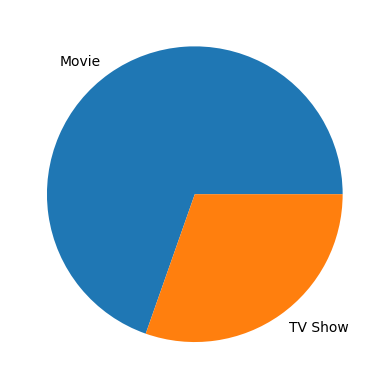

In [57]:
labels = netflix['type'].unique()
values = netflix['type'].value_counts()

plt.pie(values, labels = labels)

### b.) Rating Category [Top 5]

In [67]:
newdata = netflix.groupby('rating').size().rename_axis('Rating').reset_index(name='Count')
nd = newdata.sort_values(by ='Count', ascending=True)
nd = nd.tail(5)

<BarContainer object of 5 artists>

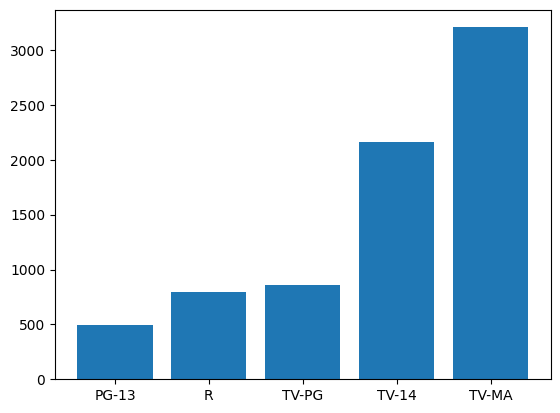

In [68]:
plt.bar(list(nd.Rating), list(nd['Count']))

### c.) Top Directors

In [69]:
fil_directors = netflix['director'].str.split(',',expand=True).stack()
fil_directors= pd.DataFrame(fil_directors)
fil_directors.columns = ['director']
directors = fil_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
directors = directors.head(5)
directors

,director,counts
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16


<BarContainer object of 5 artists>

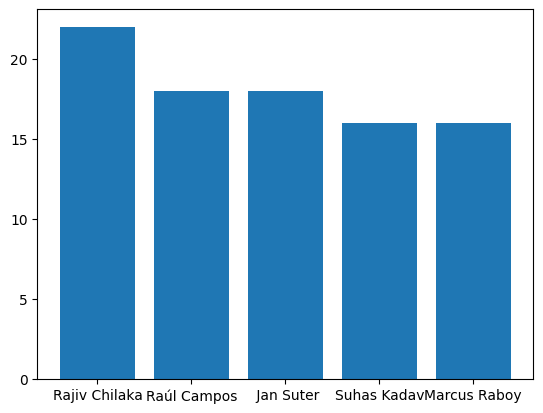

In [70]:
plt.bar(list(directors.director), list(directors.counts))

### d.) Top Actors

In [72]:
fil_actors = netflix['cast'].str.split(',',expand=True).stack()
fil_actors= pd.DataFrame(fil_actors)
fil_actors.columns = ['cast']
actors = fil_actors.groupby(['cast']).size().reset_index(name='counts')
actors = actors.sort_values(by='counts',ascending=False)
actors = actors[actors['cast'] != 'No Cast']
actors = actors.head(5)
actors

,cast,counts
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27


<BarContainer object of 5 artists>

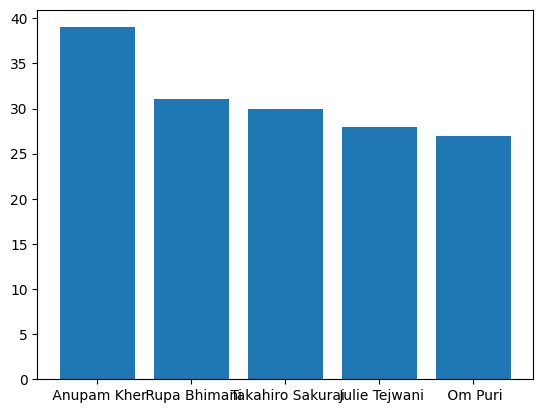

In [74]:
plt.bar(list(actors.cast), list(actors.counts))

### e.) Focus on Movies vs TV Shows in recent years

Text(0, 0.5, 'Count')

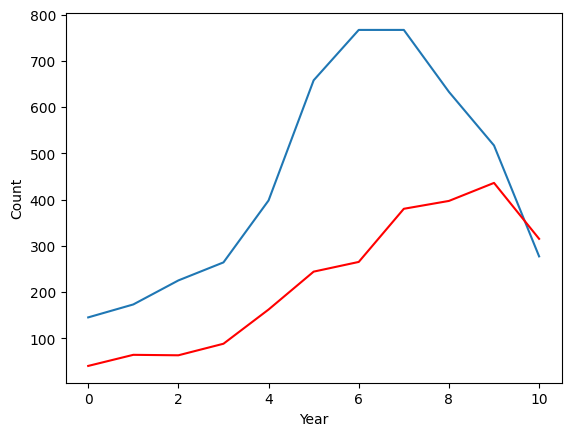

In [80]:
dff = netflix[['type','release_year']]
dff = dff.rename(columns = {'release_year' : 'Release Year'})
dff2 = dff.groupby(['Release Year','type']).size().reset_index(name='Total Content')
dff2 = dff2[dff2['Release Year']>=2011]
mov = dff2[dff2['type']=='Movie']
ts = dff2[dff2['type']=='TV Show']

plt.plot(list(mov['Total Content']))
plt.plot(list(ts['Total Content']), c="red")
plt.xlabel("Year")
plt.ylabel("Count")

In [81]:
#data preprocessing
netflix = np.array(netflix)
sum = 0
#cleaning the dataset
for x in netflix:
    y = x[4]
    if (y != y):
        sum += 1
        x[4] = ""

### f.) Year of Release

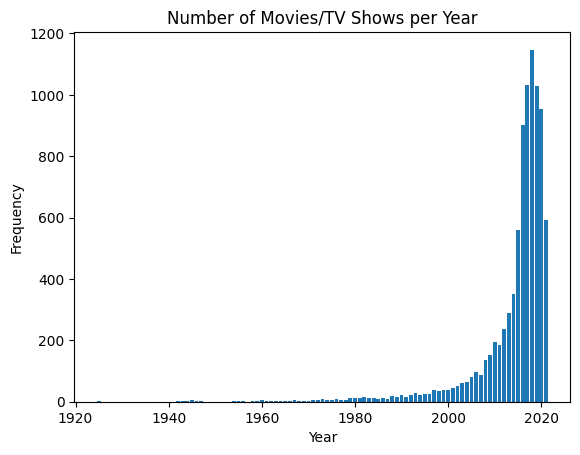

In [82]:
C = collections.Counter([d[7] for d in netflix])
plt.xlabel("Year") 
plt.ylabel("Frequency")
plt.title("Number of Movies/TV Shows per Year") 
plt.bar(list(C.keys()), list(C.values()))
plt.show()

### g.) Cast Size

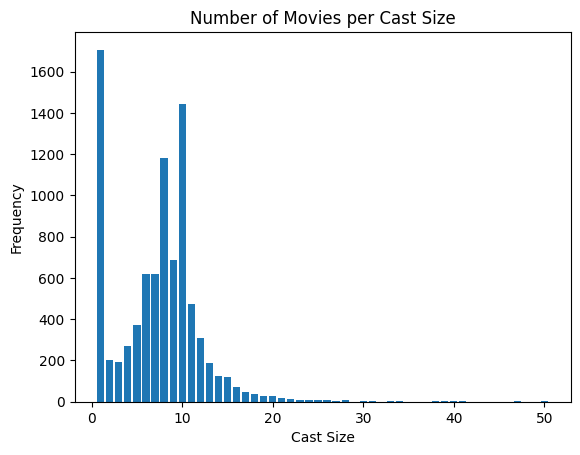

In [83]:
C = collections.Counter([len(d[4].split(",")) for d in netflix])
plt.xlabel("Cast Size") 
plt.ylabel("Frequency")
plt.title("Number of Movies per Cast Size") 
plt.bar(list(C.keys()), list(C.values()))
plt.show()

#### Movies with the largest casts

In [5]:
netflix_longest_cast = sorted(netflix, key=lambda i: len(i[4]), reverse=True)
for i in range(5):
    print(netflix_longest_cast[i][2], "=", len(netflix_longest_cast[i][4]))

Black Mirror = 771
Social Distance = 764
Creeped Out = 749
COMEDIANS of the world = 709
Narcos = 680


## II. Forming a Network of Actors and Analyzing it

(We formed the network with the help of 'networkx' library of python)

In [2]:
#forming the social network for taken dataset
#using the networkx library of python

G = nx.MultiGraph()
for x in netflix:
    for i in range(0, len(x[4].split(","))):
        for j in range(i+1, len(x[4].split(","))):
            G.add_edge(x[4].split(",")[i],x[4].split(",")[j],title=x[2])
            
print("Number of nodes in this Social Network : ",G.number_of_nodes())
print("Number of edges in this Social Network : ",G.number_of_edges())

NameError: name 'nx' is not defined

### a.) Actors with the most number of Movies

In [ ]:
D = {}
for v in G.nodes():
    E = list(G.edges(v, data=True))
    S = set() 
    for e in E:
        S.add(e[2]["title"]) 
        D[v] = S
L = sorted(D.items(), key=lambda item: len(item[1]), reverse=True) 
for i in range(10):
    print(L[i][0], ":", len(L[i][1]))

 Anupam Kher : 39
 Rupa Bhimani : 31
 Takahiro Sakurai : 30
 Julie Tejwani : 28
 Om Puri : 27
 Rajesh Kava : 26
Shah Rukh Khan : 26
 Andrea Libman : 25
 Yuki Kaji : 25
 Boman Irani : 25


### b.) Actor Partnerships (and the number of Movies they've worked together in)

In [ ]:
D = {}
for e in G.edges():
    D[e[0] + " and " + e[1]] = G.number_of_edges(e[0], e[1])
L = sorted(D.items(), key=lambda kv: kv[1], reverse=True) 
for i in range(5):
    print(L[i][0], ":", L[i][1])

 Julie Tejwani and  Rupa Bhimani : 26
 Julie Tejwani and  Rajesh Kava : 22
 Rupa Bhimani and  Rajesh Kava : 22
 Julie Tejwani and  Jigna Bhardwaj : 20
 Rupa Bhimani and  Jigna Bhardwaj : 20


### c.) Finding the shortest path between any two actors

In [ ]:
G = nx.Graph()
for movie in netflix:
    for i in range(0, len(movie[4].split(",")) - 1):
        for j in range(i + 1, len(movie[4].split(","))):
            G.add_edge(movie[4].split(",")[i], movie[4].split(",")[j], title=movie[2]) 
print("Number of nodes in simple graph =", G.number_of_nodes())
print("Number of edges in simple graph =", G.number_of_edges()) 
print("Graph Connected? =", nx.is_connected(G))

Number of nodes in simple graph = 38743
Number of edges in simple graph = 291480
Graph Connected? = False


In [ ]:
P = nx.shortest_path(G, source="Anupam Kher", target="Shah Rukh Khan")
print(P)

['Anupam Kher', ' Boman Irani', 'Shah Rukh Khan']


In [ ]:
def writePath(G, u, v):
    print("Here is the shortest path from", u, "to", v, ":") 
    if not u in G or not v in G:
        print(" Error:", u, "and/or", v, "are not in the network") 
        return
    try:
        P = nx.shortest_path(G, source=u, target=v)
        for i in range(len(P) - 1):
            t = G.edges[P[i],P[i+1]]["title"]
            print(" ", P[i], "was in", t, "with", P[i+1]) 
    except nx.NetworkXNoPath:
        print(" No path exists between", u, "and", v)
        
writePath(G, "Anupam Kher", "Shah Rukh Khan")

Here is the shortest path from Anupam Kher to Shah Rukh Khan :
  Anupam Kher was in Khosla Ka Ghosla with  Boman Irani
   Boman Irani was in Happy New Year with Shah Rukh Khan


## III. Connectivity and Centrality Analysis

In [12]:
C = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)] 
print("Number of components =", len(C))
print("Component sizes =", C)

Number of components = 639
Component sizes = [34395, 127, 32, 24, 23, 23, 23, 22, 22, 20, 20, 20, 18, 18, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [13]:
C = max(nx.connected_components(G), key=len)
G = G.subgraph(C)
print("Number of nodes in simple graph =", G.number_of_nodes())
print("Number of edges in simple graph =", G.number_of_edges()) 
print("Graph Connected? =", nx.is_connected(G))

Number of nodes in simple graph = 34395
Number of edges in simple graph = 276197
Graph Connected? = True


### a.) Degree Centrality

In [14]:
D = nx.degree_centrality(G)
L = sorted(D.items(), key=lambda item: item[1], reverse=True)
#top 10
for i in range(10): 
    print(L[i][0], ":", L[i][1])

 Anupam Kher : 0.007501308367738559
 Takahiro Sakurai : 0.006774437401872419
 Yuichi Nakamura : 0.006192940629179508
 Fred Tatasciore : 0.006134790951910217
 Fred Armisen : 0.006105716113275571
 Yuki Kaji : 0.006018491597371635
 Junichi Suwabe : 0.005756818049659824
 Katsuyuki Konishi : 0.005698668372390533
 Maya Rudolph : 0.005378845147409432
 Om Puri : 0.005378845147409432


### b.) Closeness Centrality

In [15]:
V = [L[i][0] for i in range(len(L))]
D = {}
start = time.time()
for i in range(5):
    D[V[i]] = nx.closeness_centrality(G, V[i])
    end = time.time()
    print("Time taken =", end-start, "seconds")
L = sorted(D.items(), key=lambda item: item[1], reverse=True)
#top 5
for i in range(5): 
    print(L[i][0], ":", L[i][1])

Time taken = 0.3664519786834717 seconds
Time taken = 0.7243342399597168 seconds
Time taken = 1.082045078277588 seconds
Time taken = 1.445815086364746 seconds
Time taken = 1.8056600093841553 seconds
 Fred Tatasciore : 0.2557440923218774
 Fred Armisen : 0.25186367697242196
 Anupam Kher : 0.24154616513684152
 Yuichi Nakamura : 0.20801606357692795
 Takahiro Sakurai : 0.18677571057747658


In [16]:
#getting a smaller subset of dataset
f = open('./datasets/data.json')

data = json.load(f)
Movies = []
for i in data['movies']:
    if 'year' in i.keys():
        Movies.append(i)


f.close()

G2 = nx.Graph()
for movie in Movies:
    for i in range(0, len(movie["cast"]) - 1):
        for j in range(i + 1, len(movie["cast"])):
            G2.add_edge(movie["cast"][i], movie["cast"][j], title=movie["title"])

## IV. Link Prediction

Link—or edge—prediction is the ability to predict the likelihood of any existing pair of nodes of forming a new connection. It is used, for instance, in Facebook to suggest new friends.

Here bellow we will look at different link prediction approaches. First, let us use a common graph for all of them:

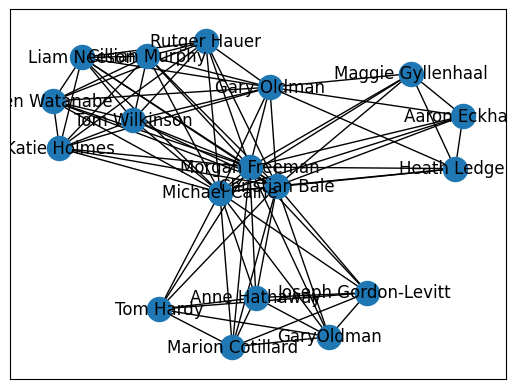

In [17]:
nx.draw_networkx(G2)

### a.) Common Neighbour

This approach consists on measuring the number of common neighbours between two nodes.
For example, lets look at the common neighbours of Anne Hathaway and Tom Hardy in the above network:

In [18]:
list(nx.common_neighbors(G2,'Anne Hathaway','Tom Hardy'))

['Christian Bale',
 'Michael Caine',
 'GaryOldman',
 'Marion Cotillard',
 'Joseph Gordon-Levitt ',
 'Morgan Freeman']

With this notion in mind, we can construct a probability table as follows:

In [19]:
neighbours = [ (u,v,len(list(nx.common_neighbors(G2,u,v)))) for u,v in nx.non_edges(G2) ]
                            
def show_probas(edges):
    s  = ""
    s += "Probability | Edges      \n"
    s += "------------|------------\n"
    for p in sorted(set([ p for _,_,p in edges ]),reverse=True):
        es = ", ".join([ "(%s,%s)" % (u,v) for u,v,p2 in edges if p == p2])
        s += "%f | %s \n" % (p,es)
    display(Markdown(s))

show_probas(neighbours)

Probability | Edges      
------------|------------
4.000000 | (Rutger Hauer,Heath Ledger), (Rutger Hauer,Maggie Gyllenhaal), (Rutger Hauer,Aaron Eckhart), (Liam Neeson,Heath Ledger), (Liam Neeson,Maggie Gyllenhaal), (Liam Neeson,Aaron Eckhart), (Heath Ledger,Tom Wilkinson), (Heath Ledger,Ken Watanabe), (Heath Ledger,Cillian Murphy), (Heath Ledger,Katie Holmes), (Maggie Gyllenhaal,Tom Wilkinson), (Maggie Gyllenhaal,Ken Watanabe), (Maggie Gyllenhaal,Cillian Murphy), (Maggie Gyllenhaal,Katie Holmes), (Aaron Eckhart,Tom Wilkinson), (Aaron Eckhart,Ken Watanabe), (Aaron Eckhart,Cillian Murphy), (Aaron Eckhart,Katie Holmes) 
3.000000 | (Rutger Hauer,Tom Hardy), (Rutger Hauer,Marion Cotillard), (Rutger Hauer,Joseph Gordon-Levitt ), (Rutger Hauer,GaryOldman), (Rutger Hauer,Anne Hathaway), (Liam Neeson,Tom Hardy), (Liam Neeson,Marion Cotillard), (Liam Neeson,Joseph Gordon-Levitt ), (Liam Neeson,GaryOldman), (Liam Neeson,Anne Hathaway), (Heath Ledger,Tom Hardy), (Heath Ledger,Marion Cotillard), (Heath Ledger,Joseph Gordon-Levitt ), (Heath Ledger,GaryOldman), (Heath Ledger,Anne Hathaway), (Maggie Gyllenhaal,Tom Hardy), (Maggie Gyllenhaal,Marion Cotillard), (Maggie Gyllenhaal,Joseph Gordon-Levitt ), (Maggie Gyllenhaal,GaryOldman), (Maggie Gyllenhaal,Anne Hathaway), (Tom Hardy,Aaron Eckhart), (Tom Hardy,Tom Wilkinson), (Tom Hardy,Ken Watanabe), (Tom Hardy,Cillian Murphy), (Tom Hardy,Katie Holmes), (Tom Hardy,Gary Oldman), (Marion Cotillard,Aaron Eckhart), (Marion Cotillard,Tom Wilkinson), (Marion Cotillard,Ken Watanabe), (Marion Cotillard,Cillian Murphy), (Marion Cotillard,Katie Holmes), (Marion Cotillard,Gary Oldman), (Aaron Eckhart,Joseph Gordon-Levitt ), (Aaron Eckhart,GaryOldman), (Aaron Eckhart,Anne Hathaway), (Tom Wilkinson,Anne Hathaway), (Tom Wilkinson,Joseph Gordon-Levitt ), (Tom Wilkinson,GaryOldman), (Cillian Murphy,Anne Hathaway), (Cillian Murphy,Joseph Gordon-Levitt ), (Cillian Murphy,GaryOldman), (Ken Watanabe,Anne Hathaway), (Ken Watanabe,Joseph Gordon-Levitt ), (Ken Watanabe,GaryOldman), (GaryOldman,Katie Holmes), (GaryOldman,Gary Oldman), (Joseph Gordon-Levitt ,Katie Holmes), (Joseph Gordon-Levitt ,Gary Oldman), (Katie Holmes,Anne Hathaway), (Gary Oldman,Anne Hathaway) 


### b.) Jaccard Coefficient

This is a normalised version of the simple “count the neighbours” approach, in which the number of common neighbours is divided by the union of neighbours for each of the nodes in the edge.
Let us again take "Anne Hathaway" and "Tom Hardy" as example to compute the values:

In [20]:
common = set(nx.common_neighbors(G2,'Anne Hathaway','Tom Hardy'))
a = set(nx.neighbors(G2,'Anne Hathaway'))
c = set(nx.neighbors(G2,'Tom Hardy'))
union_a_c = a.union(c)
print("(Anne Hathaway, Tom Hardy) common neighbours:\n%s (%d)\n" % (common, len(common)))
print("Anne Hathaway's neighbours:\n%s\n" % a)
print("Tom Hardy's neighbours:\n%s\n" % c)
print("Union(Anne Hathaway, Tom Hardy) =\n%s (%d)\n" % (union_a_c, len(union_a_c)))
print("Jaccard coefficient = %d/%d = %2.2f" % (len(common),len(union_a_c),(len(common)/len(union_a_c))))

(Anne Hathaway, Tom Hardy) common neighbours:
{'Marion Cotillard', 'Michael Caine', 'Joseph Gordon-Levitt ', 'GaryOldman', 'Christian Bale', 'Morgan Freeman'} (6)

Anne Hathaway's neighbours:
{'Tom Hardy', 'Marion Cotillard', 'Michael Caine', 'Joseph Gordon-Levitt ', 'GaryOldman', 'Christian Bale', 'Morgan Freeman'}

Tom Hardy's neighbours:
{'Marion Cotillard', 'Michael Caine', 'Joseph Gordon-Levitt ', 'GaryOldman', 'Christian Bale', 'Anne Hathaway', 'Morgan Freeman'}

Union(Anne Hathaway, Tom Hardy) =
{'Tom Hardy', 'Marion Cotillard', 'Michael Caine', 'Joseph Gordon-Levitt ', 'GaryOldman', 'Christian Bale', 'Anne Hathaway', 'Morgan Freeman'} (8)

Jaccard coefficient = 6/8 = 0.75


### c.) Resource Allocation

This measurement penalises common nodes that have lots of neighbours. Therefore, the number of common neighbours is divided by their total degree. 
For example, for ‘Anne Hathaway’, and ‘Tom Hardy’, the calculation works as follows:

In [21]:
common   = set(nx.common_neighbors(G2,'Anne Hathaway','Tom Hardy'))
common_l = len(common) 
x1 = nx.degree(G2,'Christian Bale')
x2 = nx.degree(G2,'Morgan Freeman')
x3 = nx.degree(G2,'Joseph Gordon-Levitt ')
x4 = nx.degree(G2,'Michael Caine')
x5 = nx.degree(G2,'GaryOldman')
x6 = nx.degree(G2,'Marion Cotillard')
print("(Anne Hathaway, Tom Hardy) common neighbours: \n%s (%d)\n" % (common, len(common)))
print("[Christian Bale] degree: %s" % x1)
print("[Morgan Freeman] degree: %s" % x2)
print("[Joseph Gordon-Levitt] degree: %s" % x3)
print("[Michael Caine] degree: %s" % x4)
print("[GaryOldman] degree: %s" % x5)
print("[Marion Cotillard] degree: %s" % x6)
print("Resource Allocation Index = 1/%d + 1/%d + 1/%d + 1/%d + 1/%d + 1/%d = %2.2f" 
        % (x1,x2,x3,x4,x5,x6,(1/x1+1/x2+1/x3+1/x4+1/x5+1/x6)))

(Anne Hathaway, Tom Hardy) common neighbours: 
{'Marion Cotillard', 'Michael Caine', 'Joseph Gordon-Levitt ', 'GaryOldman', 'Christian Bale', 'Morgan Freeman'} (6)

[Christian Bale] degree: 17
[Morgan Freeman] degree: 17
[Joseph Gordon-Levitt] degree: 7
[Michael Caine] degree: 17
[GaryOldman] degree: 7
[Marion Cotillard] degree: 7
Resource Allocation Index = 1/17 + 1/17 + 1/7 + 1/17 + 1/7 + 1/7 = 0.61


### d.) Adamic-Adar Index

This is similar to the resource allocation index, but the degree is passed to the log function. 
So, for nodes Anne Hathaway and Tom Hardy, the calculation is 
1/log(degree("Christian Bale")) + 1/log(degree("Morgan Freeman")) + 1/log(degree("Joseph Gordon-Levitt ")) + 1/log(degree("Michael Caine")) + 1/log(degree("GaryOldman")) + 1/log(degree("Marion Cotillard")) , 
given that Christian Bale, Morgan Freeman, Joseph Gordon-Levitt, Michael Caine, GaryOldman and Marion Cotillard are their common neighbours.

The complete results are as follows:

In [22]:
adamic_adar = list(nx.adamic_adar_index(G2))
show_probas(adamic_adar)

Probability | Edges      
------------|------------
1.461298 | (Rutger Hauer,Heath Ledger), (Rutger Hauer,Maggie Gyllenhaal), (Rutger Hauer,Aaron Eckhart), (Liam Neeson,Heath Ledger), (Liam Neeson,Maggie Gyllenhaal), (Liam Neeson,Aaron Eckhart), (Heath Ledger,Tom Wilkinson), (Heath Ledger,Ken Watanabe), (Heath Ledger,Cillian Murphy), (Heath Ledger,Katie Holmes), (Maggie Gyllenhaal,Tom Wilkinson), (Maggie Gyllenhaal,Ken Watanabe), (Maggie Gyllenhaal,Cillian Murphy), (Maggie Gyllenhaal,Katie Holmes), (Aaron Eckhart,Tom Wilkinson), (Aaron Eckhart,Ken Watanabe), (Aaron Eckhart,Cillian Murphy), (Aaron Eckhart,Katie Holmes) 
1.058868 | (Rutger Hauer,Tom Hardy), (Rutger Hauer,Marion Cotillard), (Rutger Hauer,Joseph Gordon-Levitt ), (Rutger Hauer,GaryOldman), (Rutger Hauer,Anne Hathaway), (Liam Neeson,Tom Hardy), (Liam Neeson,Marion Cotillard), (Liam Neeson,Joseph Gordon-Levitt ), (Liam Neeson,GaryOldman), (Liam Neeson,Anne Hathaway), (Heath Ledger,Tom Hardy), (Heath Ledger,Marion Cotillard), (Heath Ledger,Joseph Gordon-Levitt ), (Heath Ledger,GaryOldman), (Heath Ledger,Anne Hathaway), (Maggie Gyllenhaal,Tom Hardy), (Maggie Gyllenhaal,Marion Cotillard), (Maggie Gyllenhaal,Joseph Gordon-Levitt ), (Maggie Gyllenhaal,GaryOldman), (Maggie Gyllenhaal,Anne Hathaway), (Tom Hardy,Aaron Eckhart), (Tom Hardy,Tom Wilkinson), (Tom Hardy,Ken Watanabe), (Tom Hardy,Cillian Murphy), (Tom Hardy,Katie Holmes), (Tom Hardy,Gary Oldman), (Marion Cotillard,Aaron Eckhart), (Marion Cotillard,Tom Wilkinson), (Marion Cotillard,Ken Watanabe), (Marion Cotillard,Cillian Murphy), (Marion Cotillard,Katie Holmes), (Marion Cotillard,Gary Oldman), (Aaron Eckhart,Joseph Gordon-Levitt ), (Aaron Eckhart,GaryOldman), (Aaron Eckhart,Anne Hathaway), (Tom Wilkinson,Anne Hathaway), (Tom Wilkinson,Joseph Gordon-Levitt ), (Tom Wilkinson,GaryOldman), (Cillian Murphy,Anne Hathaway), (Cillian Murphy,Joseph Gordon-Levitt ), (Cillian Murphy,GaryOldman), (Ken Watanabe,Anne Hathaway), (Ken Watanabe,Joseph Gordon-Levitt ), (Ken Watanabe,GaryOldman), (GaryOldman,Katie Holmes), (GaryOldman,Gary Oldman), (Joseph Gordon-Levitt ,Katie Holmes), (Joseph Gordon-Levitt ,Gary Oldman), (Katie Holmes,Anne Hathaway), (Gary Oldman,Anne Hathaway) 


### e.) Preferential Attachment
Preferential attachment gives a higher score to nodes that have a high degree. For an edge (u,v), this is calculated as the product of their degrees: degree(u) * degree(v).

In the results below, G2 has a degree of 17, which is the highest degree in the graph, so the highest ranked edges are those that connect with nodes with the second highest degree, which is 7.

In [23]:
pref = list(nx.preferential_attachment(G2))
show_probas(pref)

Probability | Edges      
------------|------------
84.000000 | (Tom Hardy,Gary Oldman), (Marion Cotillard,Gary Oldman), (GaryOldman,Gary Oldman), (Joseph Gordon-Levitt ,Gary Oldman), (Gary Oldman,Anne Hathaway) 
63.000000 | (Rutger Hauer,Tom Hardy), (Rutger Hauer,Marion Cotillard), (Rutger Hauer,Joseph Gordon-Levitt ), (Rutger Hauer,GaryOldman), (Rutger Hauer,Anne Hathaway), (Liam Neeson,Tom Hardy), (Liam Neeson,Marion Cotillard), (Liam Neeson,Joseph Gordon-Levitt ), (Liam Neeson,GaryOldman), (Liam Neeson,Anne Hathaway), (Tom Hardy,Tom Wilkinson), (Tom Hardy,Ken Watanabe), (Tom Hardy,Cillian Murphy), (Tom Hardy,Katie Holmes), (Marion Cotillard,Tom Wilkinson), (Marion Cotillard,Ken Watanabe), (Marion Cotillard,Cillian Murphy), (Marion Cotillard,Katie Holmes), (Tom Wilkinson,Anne Hathaway), (Tom Wilkinson,Joseph Gordon-Levitt ), (Tom Wilkinson,GaryOldman), (Cillian Murphy,Anne Hathaway), (Cillian Murphy,Joseph Gordon-Levitt ), (Cillian Murphy,GaryOldman), (Ken Watanabe,Anne Hathaway), (Ken Watanabe,Joseph Gordon-Levitt ), (Ken Watanabe,GaryOldman), (GaryOldman,Katie Holmes), (Joseph Gordon-Levitt ,Katie Holmes), (Katie Holmes,Anne Hathaway) 
54.000000 | (Rutger Hauer,Heath Ledger), (Rutger Hauer,Maggie Gyllenhaal), (Rutger Hauer,Aaron Eckhart), (Liam Neeson,Heath Ledger), (Liam Neeson,Maggie Gyllenhaal), (Liam Neeson,Aaron Eckhart), (Heath Ledger,Tom Wilkinson), (Heath Ledger,Ken Watanabe), (Heath Ledger,Cillian Murphy), (Heath Ledger,Katie Holmes), (Maggie Gyllenhaal,Tom Wilkinson), (Maggie Gyllenhaal,Ken Watanabe), (Maggie Gyllenhaal,Cillian Murphy), (Maggie Gyllenhaal,Katie Holmes), (Aaron Eckhart,Tom Wilkinson), (Aaron Eckhart,Ken Watanabe), (Aaron Eckhart,Cillian Murphy), (Aaron Eckhart,Katie Holmes) 
42.000000 | (Heath Ledger,Tom Hardy), (Heath Ledger,Marion Cotillard), (Heath Ledger,Joseph Gordon-Levitt ), (Heath Ledger,GaryOldman), (Heath Ledger,Anne Hathaway), (Maggie Gyllenhaal,Tom Hardy), (Maggie Gyllenhaal,Marion Cotillard), (Maggie Gyllenhaal,Joseph Gordon-Levitt ), (Maggie Gyllenhaal,GaryOldman), (Maggie Gyllenhaal,Anne Hathaway), (Tom Hardy,Aaron Eckhart), (Marion Cotillard,Aaron Eckhart), (Aaron Eckhart,Joseph Gordon-Levitt ), (Aaron Eckhart,GaryOldman), (Aaron Eckhart,Anne Hathaway) 
